# Working with Audio Data for Machine Learning in Python
Link: https://heartbeat.fritz.ai/working-with-audio-signals-in-python-6c2bd63b2daf

## Jupyter Audio Basics
Link: https://musicinformationretrieval.com/ipython_audio.html

In [1]:
# import libraries
import librosa
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import sklearn

## Loading and Visualizing an audio file in Python

In [2]:
# path to audio file
audio_file_path = """/Users/tomaspetricek/TUL/TUL_2020:21/BP/\
Speech_Emotion_Recognition/Datasets/RAVDESS/\
converted/Audio_Speech_Actors_01-24/\
Actor_01/03-01-01-01-01-01-01.wav"""

# load audio file
sample_rate = 16000
x, sr = librosa.load(audio_file_path, sr=sample_rate)

### Playing Audio

In [3]:
ipd.Audio(audio_file_path)

### Waveform visualization

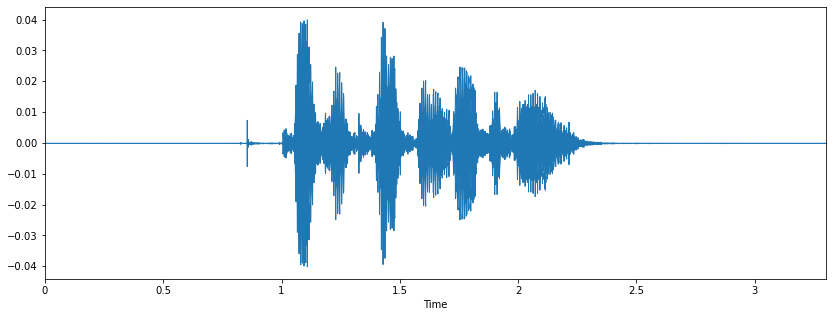

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

### Spectrogram

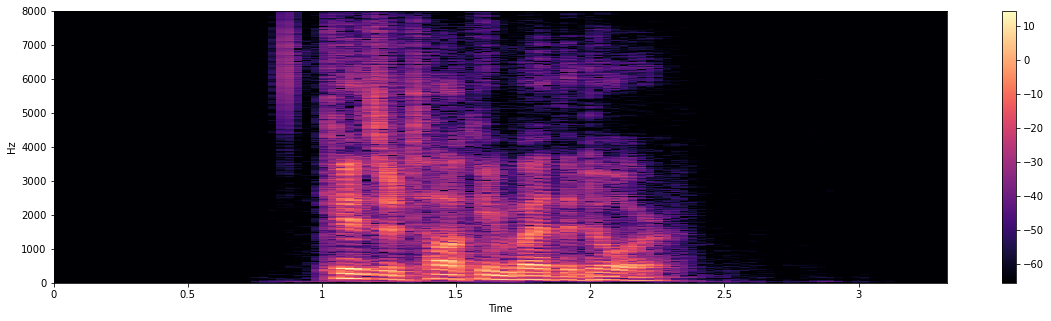

In [5]:
X = librosa.stft(x)
# converting into energy levels (dB)
XdB = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20,5))
librosa.display.specshow(
    data=XdB,
    sr=sr,
    x_axis='time',
    y_axis='hz'
)
plt.colorbar()
plt.show()

### Log Frequency Spectrogram

/Users/tomaspetricek/opt/anaconda3/envs/Speech_Emotion_Recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/tomaspetricek/opt/anaconda3/envs/Speech_Emotion_Recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/tomaspetricek/opt/anaconda3/envs/Speech_Emotion_Recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


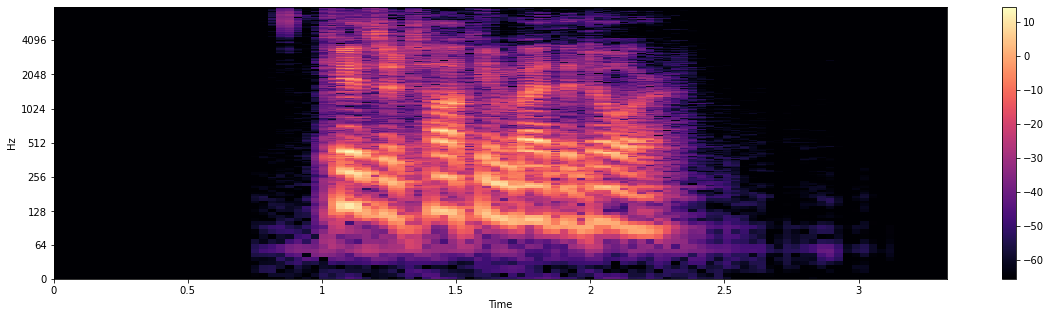

In [6]:
plt.figure(figsize=(20,5))
librosa.display.specshow(
    data=XdB,
    sr=sr,
    x_axis='time',
    y_axis='log'
)
plt.colorbar()
plt.show()

### Creating audio signal

In [7]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

#playing generated audio
ipd.Audio(x, rate=sr) # load a NumPy array

# librosa.output.write_wav('generated.wav', x, sr) # writing wave file in .wav format

## Pre-processing of audio signals

In [8]:
### Normalization